&#x1F465; Group C:

Manoranjani Navamani Kathiresan Kulanthaivel

Brice Setra Robert


### &#x1F4D1; Assignment 2

&#x1F518; 1. Use a moving average filer over 100 samples to extract the large scale fading from the power measurements (Hint: have a look at the function smooth). Substract the large scale fading from the measurements to get the small scale fading. Plot the measurements as well as the two extracted fading processes vs time in the same figure

In [1]:

## Receive the signal
include("./data/measurements.jl");

In [2]:
# Vectorize the Matlab's data to Julia's format
H₂, rxₚₒᵥᵥₑᵣ = vec(H2), vec(rx_power_dBm);     

In [3]:
using Plots, Statistics

In [4]:
# Function to implement moving average filter
function moving_average_filter(data, window_size)
    return [mean(data[max(1, i-window_size+1):i]) for i in 1:length(data)]
end

moving_average_filter (generic function with 1 method)

In [5]:
# Implementing a large scale fading using a moving average filter
window_size = 100
x = moving_average_filter(rxₚₒᵥᵥₑᵣ, window_size);

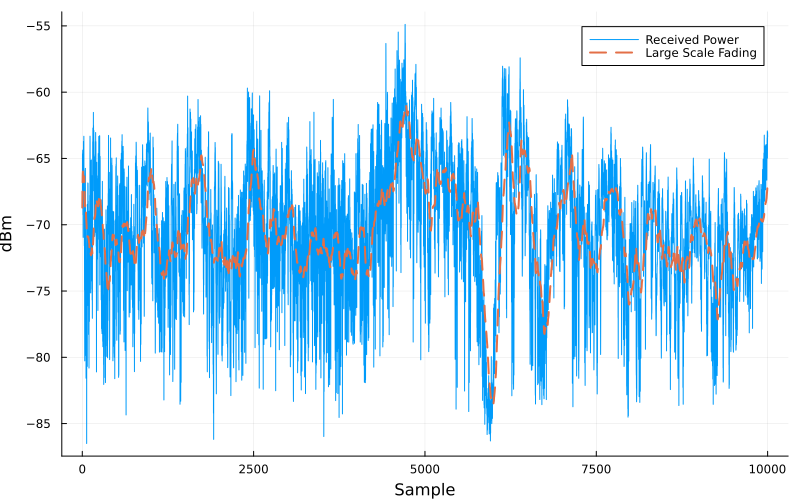

In [6]:
# Plotting
plot(rxₚₒᵥᵥₑᵣ
    , label="Received Power"
    , xlabel="Sample", ylabel="dBm"
    , linewidth=1
    , size = (800,500)
)
plot!(x
    , label="Large Scale Fading"
    , linewidth=2
    , linestyle=:dash
)

2. Plot a histogram of the large scale fading (on a log scale). Compute the mean and the vari- ance and overlay the histogram with the pdf of a lognormal
distribution of those parameters (Hint: have a look at function histfit). Discuss the result.


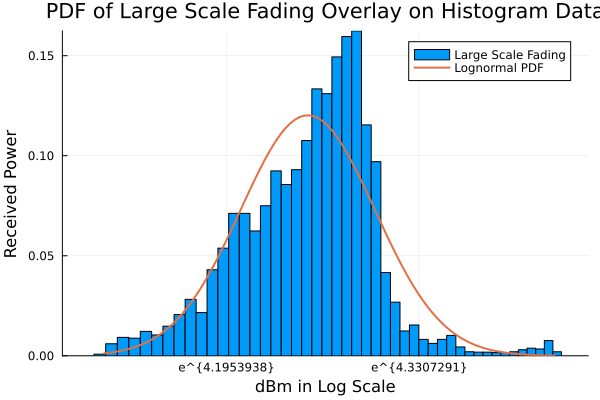

In [8]:
using Plots
using StatsBase
using Distributions

# Create histogram
histogram(-x, bins=100
    , xscale=:ln
    , normed=true
    , label="Large Scale Fading"
)

# Fit lognormal distribution to data
fit_lognormal = fit_mle(LogNormal, -x)

# Overlay histogram with PDF of lognormal distribution
x_values = exp.(range(log(minimum(-x)), log(maximum(-x)), length=100))
pdf_lognormal = pdf(fit_lognormal, x_values)
plot!(x_values, pdf_lognormal, linewidth=2, label="Lognormal PDF")

# Add labels and title
xlabel!("dBm in Log Scale")
ylabel!("Received Power")
title!("PDF of Large Scale Fading Overlay on Histogram Data")
